In [4]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.3


In [6]:
df_can = pd.read_excel('Canada.xlsx', sheet_name ='Canada by Citizenship',  skip_footer = 2)
df_can.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'},inplace = True)
df_can.columns
df_can.set_index('Country', inplace = True)
df_can.columns = list(map(str, df_can.columns))

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


In [7]:
years = list(map(str, range(1980, 2014)))
haiti=df_can.loc['Haiti', years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

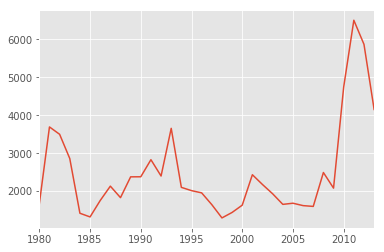

In [8]:
mpl.style.use(['ggplot'])
haiti.plot()

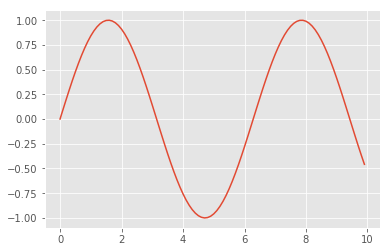

In [9]:
import math
import numpy as np
time = np.arange(0, 10, 0.1)
amp = np.sin(time)
plt.plot(time, amp)

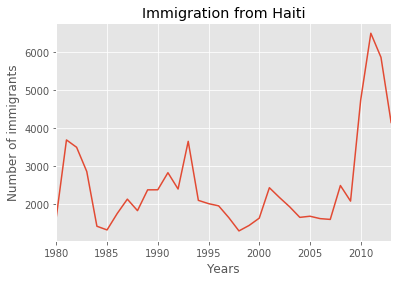

In [10]:
haiti.index = haiti.index.map(int)
# let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show() # need this line to show the updates made to the figure


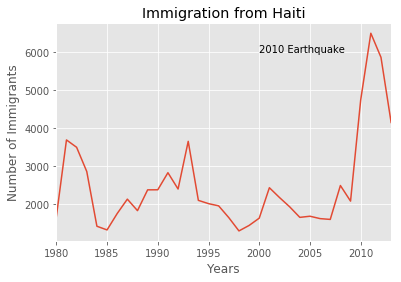

In [22]:
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
# annotate the 2010 Earthquake.
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below
plt.show() 

# Pie Chart

In [11]:
# group countries by continents and apply sum() function
df_can['Total'] = df_can.sum(axis=1)
df_continents = df_can.groupby('Continent', axis=0).sum()
# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,48708,3951,4363,3819,2671,2639,2650,3782,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,45815,109147,44197,31025,34314,30214,24696,27274,23850,28739,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39044,39754,38743,39760,44802,42720,24638,22287,20844,24370,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,29832,30395,29766,13081,15215,16769,15427,13678,15171,21179,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,1810,1810,1802,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564


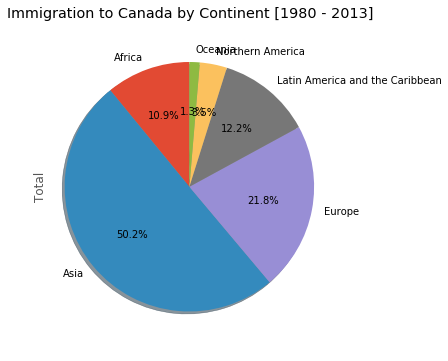

In [26]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
 figsize=(5, 6),
 autopct='%1.1f%%', # add in percentages
 startangle=90, # start angle 90° (Africa)
 shadow=True, # add shadow
 )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

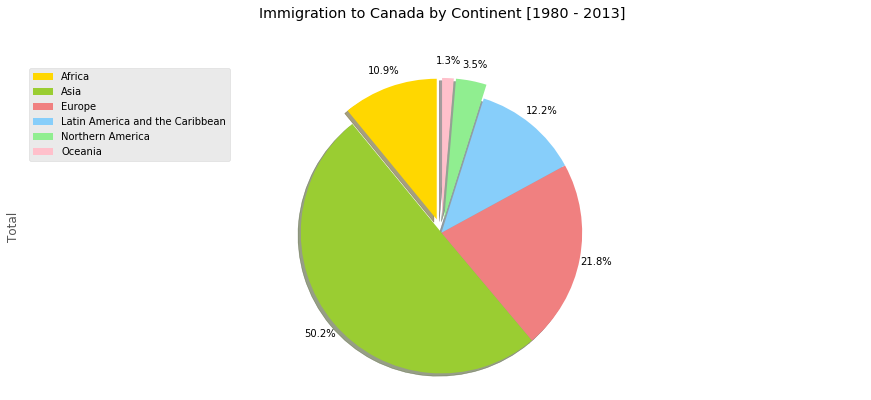

In [12]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', \
 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to of
df_continents['Total'].plot(kind='pie',
                figsize=(15, 6),
                autopct='%1.1f%%',
                startangle=90,
                shadow=True,
                labels=None, # turn off labels on pie chart
                pctdistance=1.12, # the ratio between the center of
                colors=colors_list, # add custom colors
                explode=explode_list # 'explode' lowest 3 continents
                           )
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')
# add legend
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

In [13]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


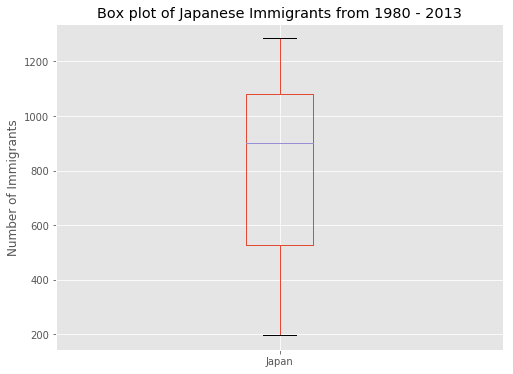

In [14]:
df_japan.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [30]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


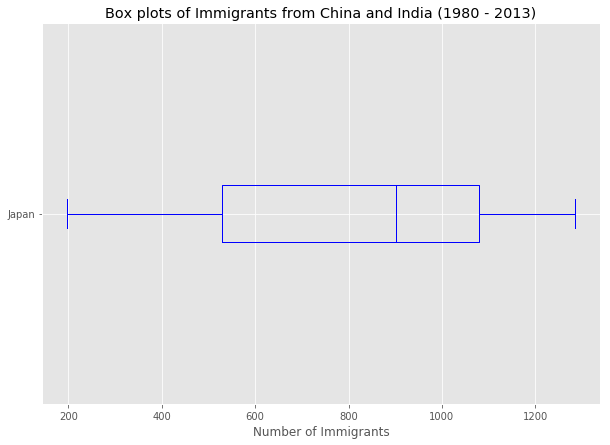

In [31]:
# horizontal box plots
df_japan.plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.show()

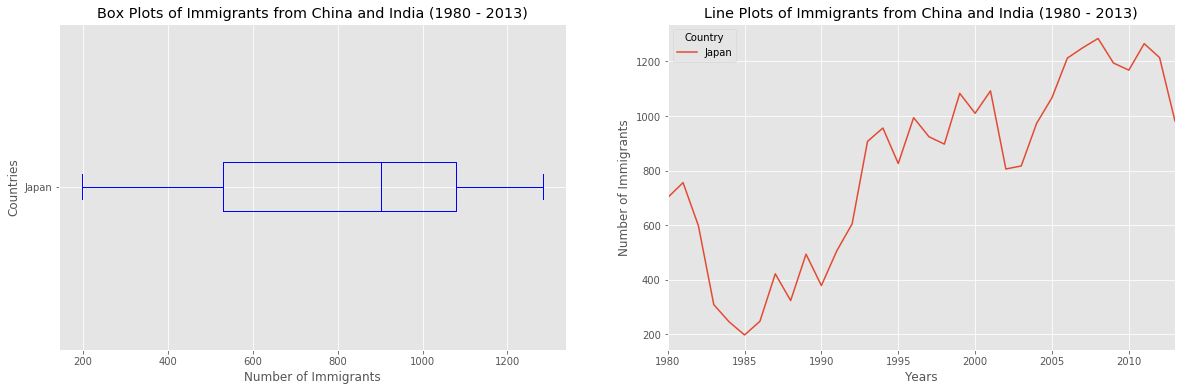

In [32]:
fig = plt.figure() # create figure
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See
# Subplot 1: Box plot
df_japan.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')
# Subplot 2: Line plot
df_japan.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
plt.show()

# Area Plots

In [33]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
# get the top 5 entries
df_top5 = df_can.head()
# transpose the dataframe
df_top5 = df_top5[years].transpose()
df_top5.head()


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


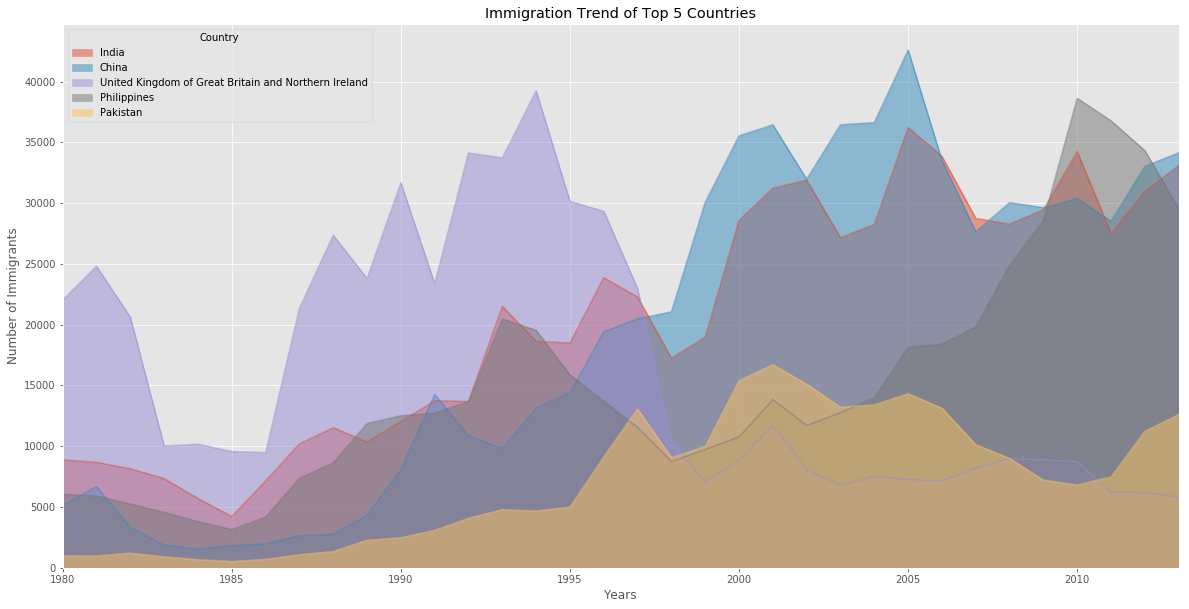

In [36]:
df_top5.index = df_top5.index.map(int)
# let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area',
 stacked=False,
 figsize=(20, 10), # pass a tuple (x, y) size
 )
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()